In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import os

In [65]:
df = pd.read_csv('Income Prediction Adult Data.csv')

In [66]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [67]:
df.shape

(32561, 15)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [69]:
# import plotly.graph_objects as go
# import plotly.express as px
# import numpy as np
# from plotly.subplots import make_subplots

# fig = make_subplots(rows=1, cols=2, subplot_titles=("Null Value Ratio Column-Wise", "Heatmap for Null Values (0 -> Not Null & 1 -> Null)"))

# temp_data = df.isna().mean().sort_values()

# fig.add_trace(go.Bar(x=temp_data.index, y=temp_data.values), row=1, col=1)

# fig.add_trace(px.imshow(df.isna().astype(np.int8)).data[0], row=1, col=2)

# fig.update_layout(showlegend=False)
# fig.show()

In [70]:
# # replacing ?s with nan values
df.replace('?',np.nan, inplace = True)

In [71]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [72]:
# checking data types
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [73]:
# identifying numerical and categorical columns
df.select_dtypes(exclude=['object']).columns.tolist()

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [74]:
df.select_dtypes(include=['object']).columns.tolist()

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [75]:
# finding percenctage of missing values in every column
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(20)

,Total,%
occupation,1843,5.7
workclass,1836,5.6
native.country,583,1.8
age,0,0.0
fnlwgt,0,0.0
education,0,0.0
education.num,0,0.0
marital.status,0,0.0
relationship,0,0.0
race,0,0.0


In [76]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [77]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [78]:
df['occupation'] = df['occupation'].fillna('Unknown')

In [79]:
df['workclass'] = df['workclass'].fillna('Unknown')

In [80]:
df['native.country'] = df['native.country'].fillna('United-States')

In [81]:
df.head(20)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,>50K


In [89]:
df['income'] = df['income'].map({'<=50K':0, '>50K':1})

In [90]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [91]:
df.income.unique()

array([0, 1], dtype=int64)

C:\Users\param\AppData\Local\Temp\ipykernel_6224\3211643088.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.round(df.corr(),2),annot=True, cmap='Blues')


<Axes: >

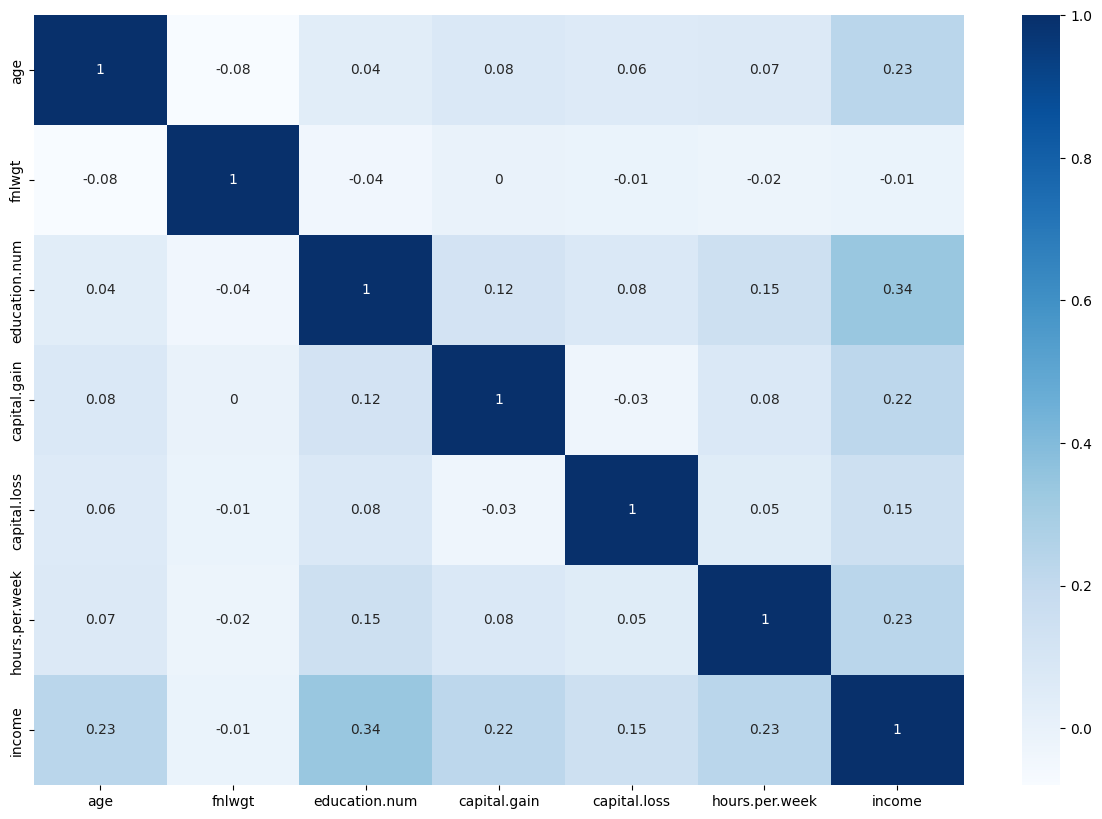

In [102]:
# checking correlation between variables
plt.figure(figsize=(15,10))
sns.heatmap(np.round(df.corr(),2),annot=True, cmap='Blues')

<Axes: xlabel='income', ylabel='count'>

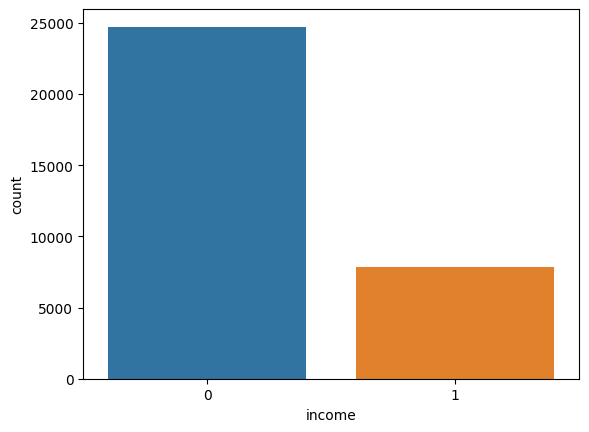

In [105]:
sns.countplot(x='income',data=df)

# # Set labels for the plot
# plt.xlabel('Target')
# plt.ylabel('Count')

# # Display the plot
# plt.show()

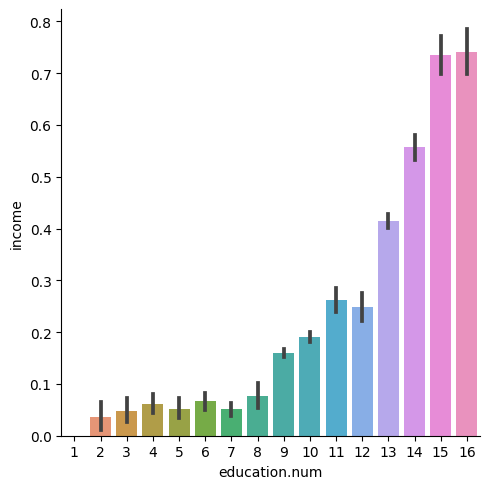

In [109]:
sns.catplot(data = df, x='education.num', y = 'income',kind= 'bar')

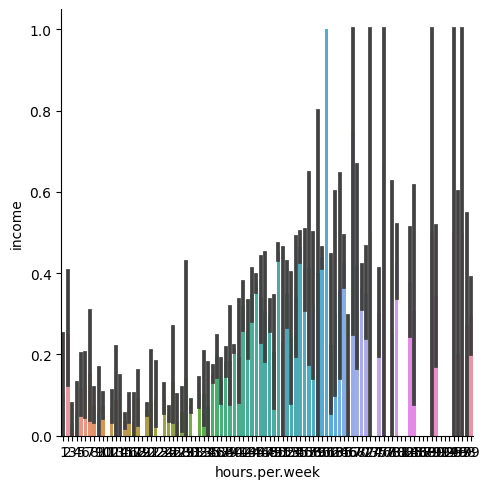

In [112]:

sns.catplot(data = df,x='hours.per.week',y='income',kind='bar')

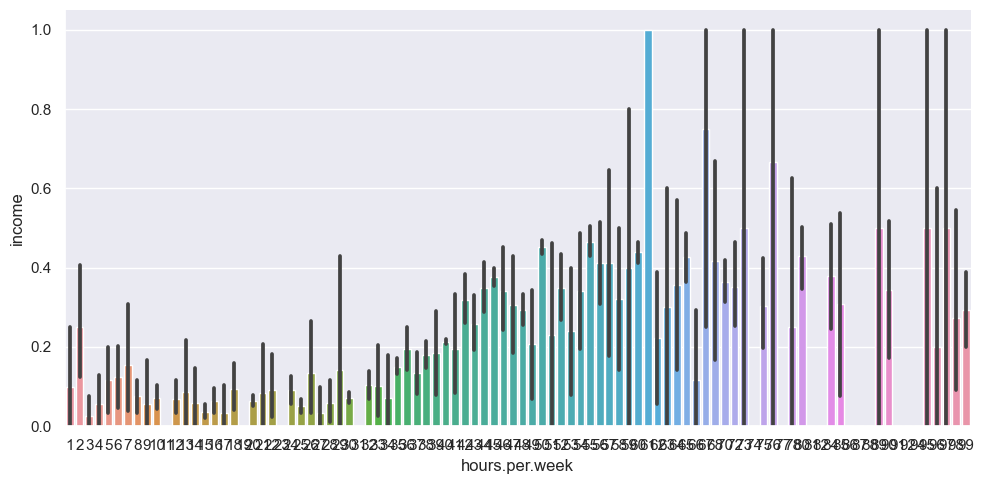

In [117]:
sns.set(rc={'figure.figsize': (15, 10)})  # Adjust the width and height as desired

# Create a catplot with spread out appearance
sns.catplot(data=df, x='hours.per.week', y='income', kind='bar', aspect=2)  # Adjust aspect ratio as desired


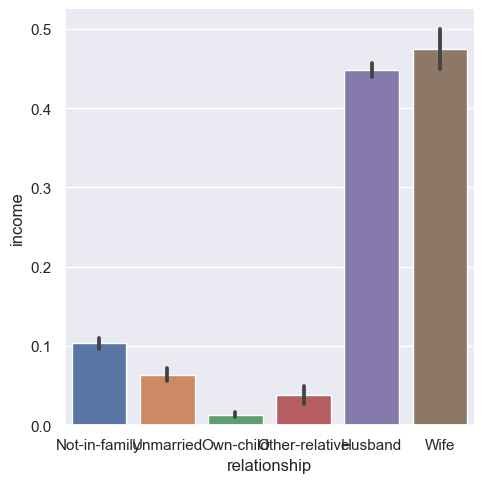

In [118]:
sns.catplot(data = df, x='relationship',y = 'income',kind='bar')

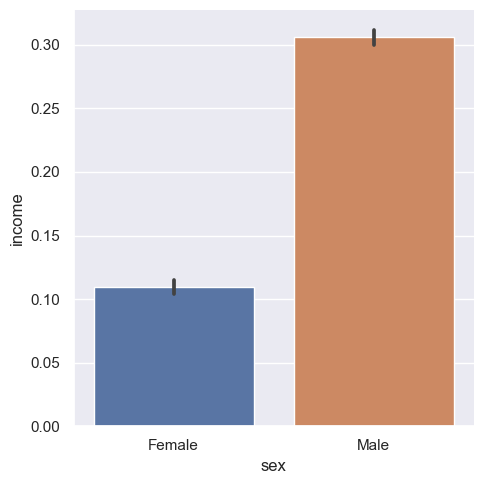

In [120]:
sns.catplot(data = df, x='sex',y = 'income',kind='bar')

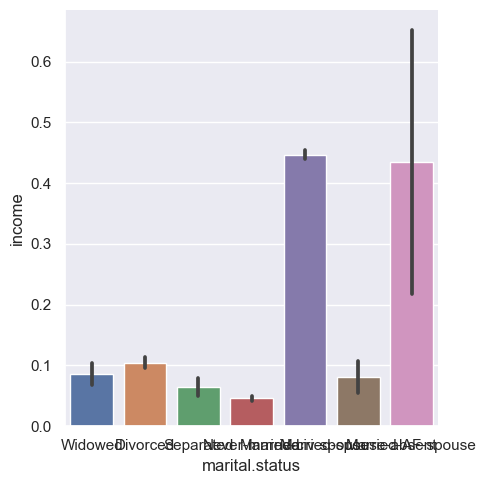

In [123]:
sns.catplot(data = df, x='marital.status',y = 'income',kind='bar')

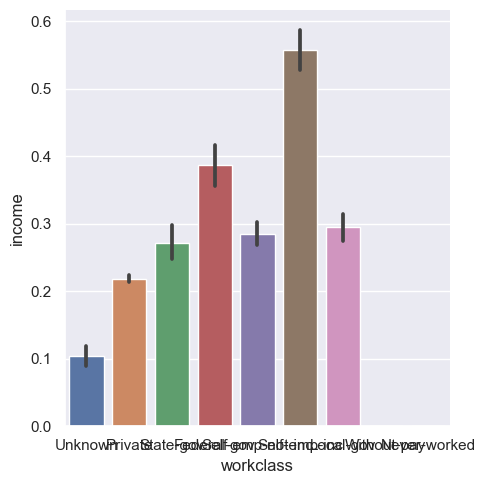

In [124]:
sns.catplot(data = df, x='workclass',y = 'income',kind='bar')

In [132]:
df['sex'][df['sex'] == 'Male'] = 0
df['sex'][df['sex'] == 'Female'] = 1

df['marital.status'][df['marital.status'] == 'Married-civ-spouse'] = 1
df['marital.status'][df['marital.status'] == 'Married-spouse-absent'] = 1
df['marital.status'][df['marital.status'] == 'Married-AF-spouse'] = 1
df['marital.status'][df['marital.status'] == 'Divorced'] = 0
df['marital.status'][df['marital.status'] == 'Separated'] = 0
df['marital.status'][df['marital.status'] == 'Never-married'] = 0
df['marital.status'][df['marital.status'] == 'Widowed'] = 0

# 'Widowed', 'Divorced', 'Separated', 'Never-married',
#        'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'

C:\Users\param\AppData\Local\Temp\ipykernel_6224\2684033581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][df['sex'] == 'Male'] = 0
C:\Users\param\AppData\Local\Temp\ipykernel_6224\2684033581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][df['sex'] == 'Female'] = 1
C:\Users\param\AppData\Local\Temp\ipykernel_6224\2684033581.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital.status'][df['marita

In [133]:
df.head(50)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Unknown,77053,HS-grad,9,0,Unknown,Not-in-family,White,1,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,0,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,0
2,66,Unknown,186061,Some-college,10,0,Unknown,Unmarried,Black,1,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,0,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,0,Prof-specialty,Own-child,White,1,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,0,Other-service,Unmarried,White,1,0,3770,45,United-States,0
6,38,Private,150601,10th,6,0,Adm-clerical,Unmarried,White,0,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,0,Prof-specialty,Other-relative,White,1,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,0,Prof-specialty,Not-in-family,White,1,0,3683,40,United-States,0
9,41,Private,70037,Some-college,10,0,Craft-repair,Unmarried,White,0,0,3004,60,United-States,1


In [138]:
df.drop(["workclass", "education", "occupation", "relationship", "race", "native.country"], axis=1, inplace=True)

In [140]:
df.head()

,age,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,1,0,4356,40,0
1,82,132870,9,0,1,0,4356,18,0
2,66,186061,10,0,1,0,4356,40,0
3,54,140359,4,0,1,0,3900,40,0
4,41,264663,10,0,1,0,3900,40,0


In [142]:
X=df.drop('income',axis=1)
y=df['income']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


In [147]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
accuracy = model.score(X_test, y_test)
print('Accuracy', accuracy)

Accuracy 0.798710271764164


In [150]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
accuracy = model.score(X_test, y_test)
print('Accuracy', accuracy)

Accuracy 0.831874712114233


In [154]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
accuracy = model.score(X_test, y_test)
print('Accuracy', accuracy)

Accuracy 0.7953324120988792


In [156]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
accuracy = model.score(X_test, y_test)
print('Accuracy', accuracy)

Accuracy 0.798710271764164
